<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/handwritten_digits_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

> The goal of this notebook is to use the famous keras mnist dataset to create a deep learning model to ID hand written digits 1-9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, X_test.shape


11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

# Explore data (Visualize it)


In [3]:
y_train, y_test.shape

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (10000,))

In [4]:
y_train[0]

5

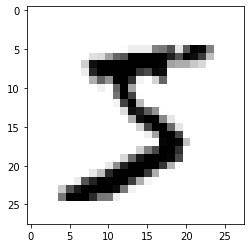

In [5]:
# plt.figure(figsize=(10, 17))
plt.imshow(X_train[0], cmap=plt.cm.binary)


In [6]:
X_train[0].shape

(28, 28)

 We have images in 28 x 28 format. Lets create a function to quickly look at different samples

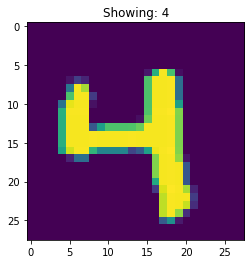

In [ ]:
import random

def see_sample():
  index = random.randint(0, len(X_train))
  
  plt.imshow(X_train[index])
  plt.title(f'Showing: {y_train[index]}')

see_sample()

# Models

First we are going to run a model without normalization to see how it compares to normalization after

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


history_1 = model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
pd.DataFrame(history_1.history).plot()

From the first model we can see that we get pretty good results with the bare minimum. 
Let's normalize the data and compare results

### Normalize

In [ ]:
# Normalizing the data

X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


history_2 = model_2.fit(X_train_norm, y_train, epochs=5, validation_data=(X_test_norm, y_test))
pd.DataFrame(history_2.history).plot()

By normalizing the data our results improve a significant amount. 
Let's play around with the layers to see if we can improve the model further 

The loss dramatically reduces 

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


history_3 = model_3.fit(X_train_norm, y_train, epochs=5, validation_data=(X_test_norm, y_test))
pd.DataFrame(history_3.history).plot()

By adding 2 hidden layes with 10 neurons each. We are able to improve the model 


### Find the optimal learning rate

Let's run a schedular to find the learning

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


history_4 = model_4.fit(X_train_norm, y_train, epochs=40, validation_data=(X_test_norm, y_test), callbacks=[lr_scheduler])
pd.DataFrame(history_4.history).plot()

In [ ]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_3.history['loss'])
plt.title('Finding the learning rate')
plt.xlabel('Learning Rate')
plt.ylabel('loss')

The Learning Rate schedular shows us that the adam default learning rate is working fine for the model

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])



history_5 = model_5.fit(X_train_norm, y_train, epochs=5, validation_data=(X_test_norm, y_test))
pd.DataFrame(history_5.history).plot()

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  
  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Evaluate model_5 with a confusion matrix
y_pred = model_5.predict(X_test_norm)
y_pred = y_pred.argmax(axis=1)
y_pred


In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:


make_confusion_matrix(y_test, y_pred, classes=[0,1,2,3,4,5,6,7,8,9], figsize=(15, 10), text_size=9)

In [ ]:
def make_rand_pred(model):
  index = random.randint(0, len(X_test_norm))
  probs = model.predict(X_test_norm[index].reshape(1, 28, 28))
  plt.imshow(X_test_norm[index], cmap=plt.cm.binary)
  classes=[0,1,2,3,4,5,6,7,8,9]

  plt.title(f'{y_test[index]}: prob: {100*tf.reduce_max(probs): .2f}%', fontsize=20)

make_rand_pred(model_5)

In [ ]:
model_5.save('./saved_model.hdf5')